# Исследование закономерностей продажи видеоигр

**Цель исследования**

Цель данного проекта состоит в том, чтобы выявить определяющие успешность игры закономерности. Это позволит определить потенциально популярные игры и соответствующим образом разпланировать рекламные кампании, в частности рекламную кампанию на 2017 год. Исследование будет проводиться на основе взятых из открытых источников исторических данных о продажах игр, оценках пользователей и критиков, жанрах и платформах.

**Описание данных**

Данные представлены следующими категориями:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План исследования**

1. Загрузка данных.

Загрузим данные и изучим общую информацию о датафрейме. 

2. Предобработка данных.

Проведем предобработку данных - проверим нашу таблицу на наличие пропусков и дубликатов, скорректируем их, при необходимости изменим тип данных в столбцах и добавим в таблицу новые столбцы.

3. Исследовательский анализ данных.

На данном этапе мы определим данные за какой период считать актуальными, учитывая, что нам требуется построить прогноз на 2017 год. Кроме того определим потенциально прибыльные платформы, изучим влияние на продажи жанра видеоигр, оценок критиков и пользователей. 

4. Портрет пользователя каждого региона

Составим портрет пользователя каждого региона (NA, EU, JP) - найдем топ-5 популярных жанров и платформ и изучим влияние рейтинга ESRB.

5. Проверка гипотез

Проверим две гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

6. Вывод.

Напишем общий вывод.

## Загрузка данных.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Датафрейм имеет размер 1.4 MB, состоит из 11 столбцов и 16715 строк, представлен типами данных 'object' (5) и 'float64' (6). В столбцах 'Critic_Score', 'User_Score' и 'Rating' имеется большое количество пропусков - 8578, 6701 и 6766, на что надо будет обратить внимание при предобработке данных, кроме того необходимо привести названия столбцов к строчным и скорректировать формат данных в столбцах 'Year_of_Release' и 'User_Score'.   

## Предобработка данных.

### Приведем названия столбцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

### Проведем преобразование типов данных и обработку пропусков в столбцах

#### Рассмотрим столбцы 'name' и 'genre'

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как в столбце всего 'name' 2 пропущенных значения мы спокойно можем их удалить, к тому же, что обе игры относятся к 1993 году и врядли помогут при разработке прогноза на 2017 год. Одновременно мы избавимся от пропусков в столбце 'genre'.

In [8]:
data.dropna(subset=['name'], inplace=True)

In [9]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

#### Рассмотрим столбец 'year_of_release'. В нем 269 пропущенных значений.

В столбце 'year_of_release' 269 пропущенных значений.

In [10]:
data['year_of_release'].unique() # Проверим нет ли аномальных значений

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Некоторые игры издавались на разных платформах, попробуем за счет этого заполнить пропуски - будем исходить из того, что выход игр на разных платформах проходил одновременно. Кроме того не стоит забывать, что некоторые игры имеют указание на год выпуска прямо в названии, в частности это характерно для спортивных игр. При этом в названии указывается предстоящий спортивный сезон, т.е. условный 'Футбол 2016' будет выпущен в 2015 году.

In [11]:
for i in data[data['year_of_release'].isna()].index:
    data['year_of_release'][i] = data[data['name'] == data['name'][i]]['year_of_release'].max()
    try:
        if int(data['name'][i].split()[-1]) >= 1980:  #Убедимся, что в конце названия игры именно год 
            data['year_of_release'][i] = int(data['name'][i].split()[-1]) - 1
    except: 
        continue

In [12]:
data['year_of_release'].unique() # Проверим не появились ли аномальные значения после замены

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

Удалим оставшиеся в столбце 'year_of_release' пропуски

In [13]:
data.dropna(subset=['year_of_release'], inplace=True)

Преобразуем тип данных в столбце 'year_of_release' в целочисленный.

In [14]:
data['year_of_release'] = data['year_of_release'].astype(int)

#### Рассмотрим столбцы 'user_score' и 'critic_score'

Перейдем к столбцам 'user_score' и 'critic_score'.

Значение 'tbd' в столбце 'user_score' расшифровывается как 'To be determined' (будет определен), т.е. пользователи еще не выставили оценку. Пропуски в столбцах с оценками пользователей можно частично объяснить тем, что сайты, позволяющие игрокам выставлять свои оценки, появились и распространились далеко не сразу. Малоизвестные игры вполне могли пройти мимо взора игровых журналистов и не получить от них вообще никаких оценок,  вполне возможно, что и среди простых игроков знакомых с этими играми не нашлось желающих выставить какую-либо оценку. Вместе с тем не стоит забывать и про возможные технические проблемы при занесении данных в таблицу. Наконец надо заметить, что данные по 2016 году могут быть неполными.

Оценки игроков и критиков порой могут значительно отличаться, поэтому заменять пробелы в одном столбце значениями из другого не корректно. Учитывая, что оценка конкретной игры зависит от самых разных факторов, в том числе личных предпочтений оценивающих, заполнять пропуски средними или медианными значениями было бы также некорректно. Заменим пропуски и значения 'tbd' в столбце 'user_score' на '-1', так мы сохраним большое количество данных и при этом эти значения с реальными оценками.

In [15]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)

In [16]:
data['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [17]:
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

Так как среди оценок критиков нет значение с ненулевой дробной частью, тип данных в столбце 'critic_score' вполне можно преобразовать в целочисленный.

In [18]:
data['critic_score'] = data['critic_score'].astype(int)

In [19]:
data['critic_score'].unique()

array([76, -1, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 35, 41, 36, 28, 31, 27, 26, 19, 23, 24, 21, 17, 13])

Преобразуем тип данных в столбце 'user_score' из 'object' в 'float'.

In [20]:
data['user_score'] = data['user_score'].astype(float)

Оценки в столбце 'user_score' имеют одну цифру после запятой, умножим значения на 10 и поменяем тип данных на целочисленный - таким образом значения в столбцах 'user_score' и 'critic_score' будут иметь один формат.

In [21]:
data['user_score'] = (data['user_score'] * 10).astype(int)

In [22]:
data['user_score'].unique()

array([ 80, -10,  83,  85,  66,  84,  86,  77,  63,  74,  82,  90,  79,
        81,  87,  71,  34,  53,  48,  32,  89,  64,  78,  75,  26,  72,
        92,  70,  73,  43,  76,  57,  50,  91,  65,  88,  69,  94,  68,
        61,  67,  54,  40,  49,  45,  93,  62,  42,  60,  37,  41,  58,
        56,  55,  44,  46,  59,  39,  31,  29,  52,  33,  47,  51,  35,
        25,  19,  30,  27,  22,  20,  95,  21,  36,  28,  18,  38,   0,
        16,  96,  24,  17,  11,   3,  15,   7,  12,  23,   5,  13,   2,
         6,  14,   9,  10,  97])

#### Рассмотрим столбец 'rating'

Организации ESRB появилась в 1994 году, что может объяснить отсутствие рейтинга у многих игр, вышедших до 2000 года, - разработчики игр не сразу стали воспринимать рейтинг ESRB как обязательный. Кроме того, не стоит забывать, что ESRB это организация, расположенная в США, соответственно игры, не издававшиеся в США, могли вовсе не получать этого рейтинга. Разумеется не стоит забывать и про возможные технические проблемы при занесении данных в таблицу и тот факт, что данные по 2016 году могут быть неполными. 

Заменим пропуски значением 'not_rated'.

In [23]:
data['rating'] = data['rating'].fillna('not_rated')

In [24]:
data['rating'].unique()

array(['E', 'not_rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

### Проверим данные на наличие дупликатов

Проверим датафрейм на наличие явных дубликатов

In [25]:
data.duplicated().sum()

0

Проверим столбец 'platform' на наличие неявных дубликатов

In [26]:
data['platform'].unique() 

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов не обнаружено

Проверим столбец 'rating' на наличие неявных дубликатов

In [27]:
data['rating'].unique()

array(['E', 'not_rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Строго говоря 'E' и 'K-A' это разные названия одного рейтинга - 'E' применяется вместо 'K-A' с 1998 года, для прогноза на 2017 год нам вероятно не понадобятся данные об играх до 1998 года. В остальном дубликатов не обнаружено.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец 'total_sales'

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     16574 non-null  int64  
 9   user_score       16574 non-null  int64  
 10  rating           16574 non-null  object 
 11  total_sales      16574 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.6+ MB


Дубликатов не обнаружено, названия столбцов скорректированы, пропуски обработаны, типы данных в столбцах 'year_of_release', 'critic_score', 'user_score' изменены. 

## Исследовательский анализ данных.

### Посмотрим сколько игр выпускалось в разные годы

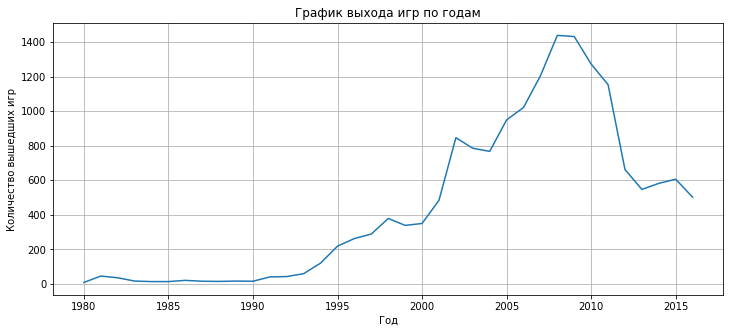

In [30]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(style='-', 
                                                                               grid=True, legend=False, figsize=(12, 5))
plt.title('График выхода игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество вышедших игр')
plt.show()

С 90-х и до 2008 года наблюдается рост числа выпускаемых игр, что объясняется ростом вычислительных мощностей, распространением CD в качестве носителя данных, что позволило создавать игры большего размера и соответственно с лучшей графикой, распростанением ОС с графическим пользовательским интерфейсом на ПК, сами ПК и игровые консоли стали более доступны.  В 2008 - 2009 годах наблюдается пик, затем наступает падение. Снижение числа выпускаемых видеоигр в последние годы объясняется ростом популярности мобильных платформ - Android и iOS. 

### Посмотрим, как менялись продажи игр по платформам. 

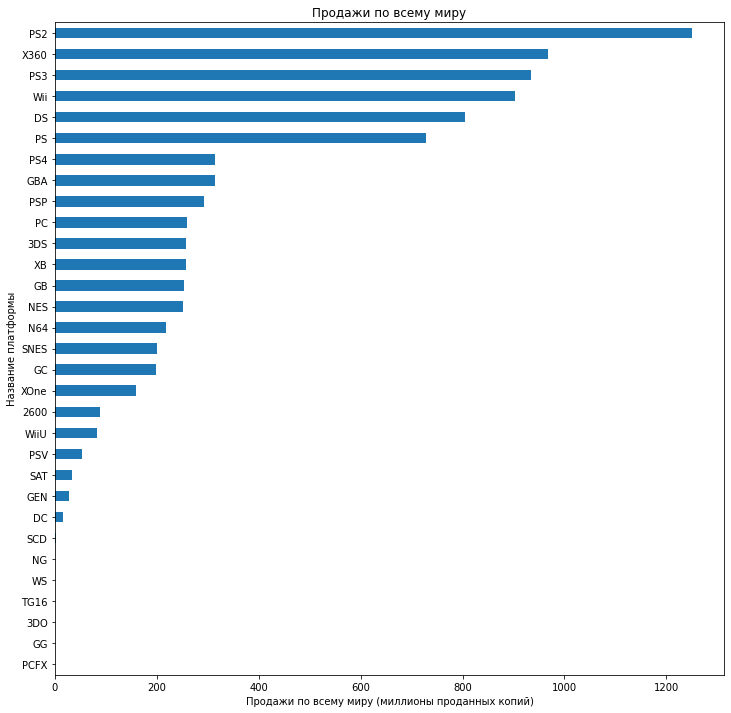

In [31]:
#data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
(data.groupby('platform')['total_sales'].agg('sum').sort_values()
 .plot(kind='barh', figsize=(12, 12), title='Продажи по всему миру', grid=False))
plt.xlabel('Продажи по всему миру (миллионы проданных копий)')
plt.ylabel('Название платформы')
plt.show()

Лидером по продажам является PS2, однако к 2016 успело появиться еще два поколения консолей от Sony - PS3 и PS4. Рассмотрим как менялись по годам продажи игр для разных поколений игровых консолей производства Sony, Microsoft и Nintendo.

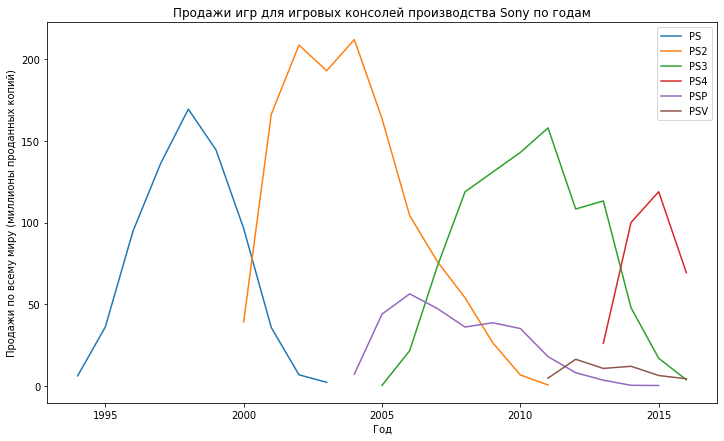

In [32]:
plt.figure(figsize=(12,7))
for platform in ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']:
#data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    plt.plot(data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'),
             label=platform)
plt.title('Продажи игр для игровых консолей производства Sony по годам')
plt.xlabel('Год')
plt.ylabel('Продажи по всему миру (миллионы проданных копий)')
plt.legend(loc=0)
plt.show()    

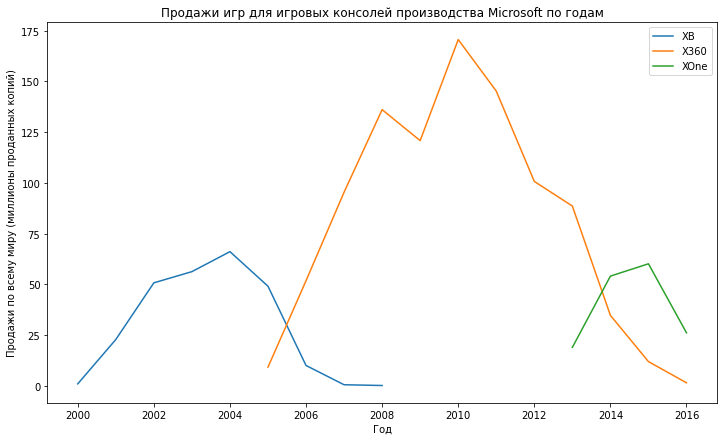

In [33]:
plt.figure(figsize=(12,7))
for platform in ['XB', 'X360', 'XOne']:
#data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    plt.plot(data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'),
             label=platform)
plt.title('Продажи игр для игровых консолей производства Microsoft по годам')
plt.xlabel('Год')
plt.ylabel('Продажи по всему миру (миллионы проданных копий)')
plt.legend(loc=0)
plt.show()    

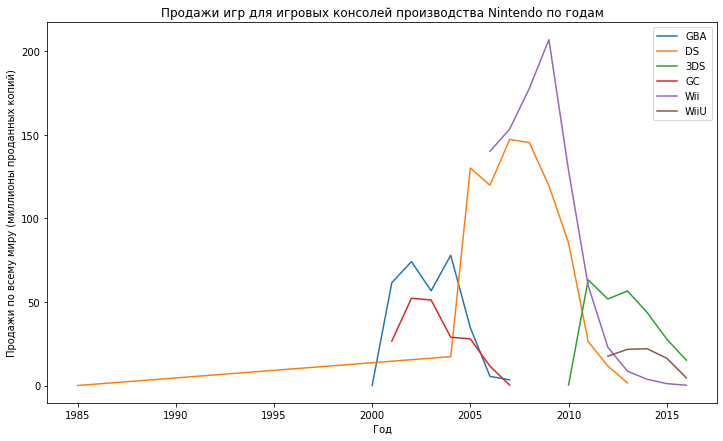

In [34]:
plt.figure(figsize=(12,7))
for platform in ['GBA', 'DS', '3DS', 'GC', 'Wii', 'WiiU']:
#data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    plt.plot(data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'),
             label=platform)
plt.title('Продажи игр для игровых консолей производства Nintendo по годам')
plt.xlabel('Год')
plt.ylabel('Продажи по всему миру (миллионы проданных копий)')
plt.legend(loc=0)
plt.show()    

График для DS выглядит странно, проверим, что за игры выходили для DS в 1985 году.

In [35]:
data.loc[(data['year_of_release'] == 1985) & (data['platform'] == 'DS')]   

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-10,not_rated,0.02


Strongest Tokyo University Shogi DS	вышла в 2007, возможно в 1985 выходила ранняя версия игры для другой платформы. Исправим год выпуска и построим график заново. 

In [36]:
data.loc[(data['name'] == 'Strongest Tokyo University Shogi DS') & (data['platform'] == 'DS'), 'year_of_release'] = 2007   

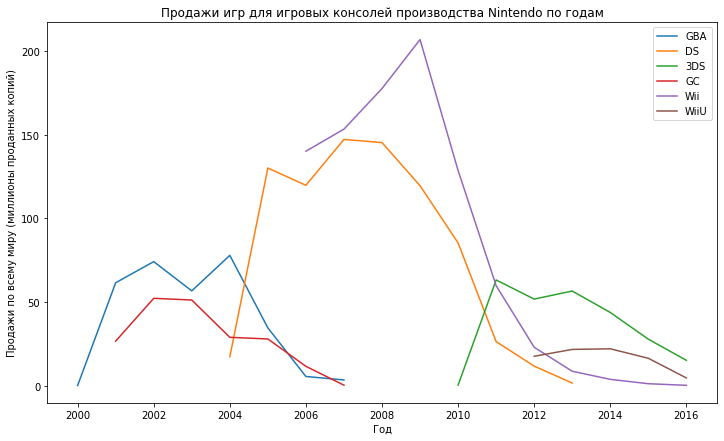

In [37]:
plt.figure(figsize=(12,7))
for platform in ['GBA', 'DS', '3DS', 'GC', 'Wii', 'WiiU']:
#data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    plt.plot(data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'), 
             label=platform)
plt.title('Продажи игр для игровых консолей производства Nintendo по годам')
plt.xlabel('Год')
plt.ylabel('Продажи по всему миру (миллионы проданных копий)')
plt.legend(loc=0)
plt.show()    

В среднем "срок жизни" игровой консоли одного поколения составляет 8-10 лет. К 2016 году продажи игр для консолей седьмого поколения (PS3, XBox360, Wii) сходят на нет, поэтому для прогноза на 2017 год имеет смысл ориентироваться на восьмое поколение консолей (PS4, XBox One, WiiU), старт которого приходится на 2011-2013 годы.

### Выберем актуальный период для составления прогноза на 2017 год 

Выберем в качестве актуального период с 2013 года - в это время начинаются мировые продажи консолей восьмого поколения PS4 и XBox One, а продажи предыдущего поколения идут на спад.

In [38]:
data_act = data[data['year_of_release'] >= 2013] 

### Рассмотрим какие платформы лидируют по продажам за выбранный период

In [39]:
data_act.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales',ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,40.06
PSV,32.99
Wii,13.66


PS3 и X360 еще в топ-5 продаж, но посмотрим на тенденцию продаж по годам. 

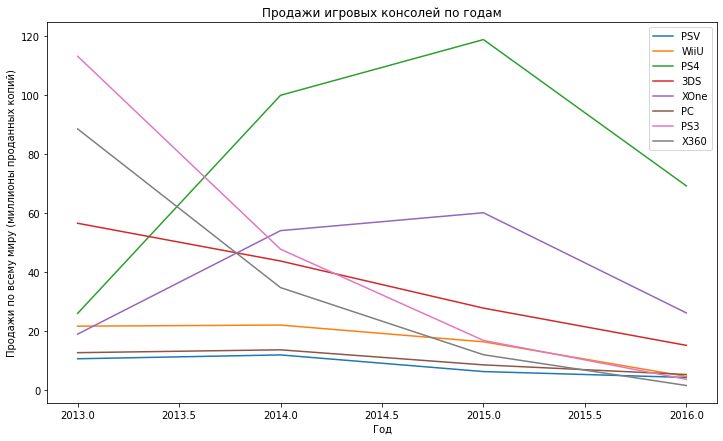

In [40]:
plt.figure(figsize=(12,7))
for platform in ['PSV', 'WiiU', 'PS4', '3DS', 'XOne', 'PC', 'PS3', 'X360']:
#data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    plt.plot(data_act[data_act['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'), 
             label=platform)
plt.title('Продажи игровых консолей по годам')
plt.xlabel('Год')
plt.ylabel('Продажи по всему миру (миллионы проданных копий)')
plt.legend(loc=0)
plt.show()    

Как и ожидалось продажи игр для консолей предыдущего поколения к 2016 году сильно просели. Впрочем после некоторого роста до 2015 (PS4 и XBox One) падение продаж наблюдается по всем платформам - разработчики все больше отдают предпочтение мобильным платформам. Оставим в качестве потенциально прибыльных 5 консолей нового поколения (PS Vita, WiiU, PS4, 3DS, Xbox One) и PC (продажи по данной платформе не так велики, но зато не прекращались с момента появдения первых игр).

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [41]:
for platform in ['PSV', 'WiiU', 'PS4', '3DS', 'XOne', 'PC']:
    print(f'Данные по {platform}')
    print(data_act[data_act['platform'] == platform]['total_sales'].describe())
    print()

Данные по PSV
count    358.000000
mean       0.092151
std        0.153816
min        0.010000
25%        0.020000
50%        0.040000
75%        0.110000
max        1.960000
Name: total_sales, dtype: float64

Данные по WiiU
count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: total_sales, dtype: float64

Данные по PS4
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

Данные по 3DS
count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

Данные по XOne
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max     

(0.0, 2.0)

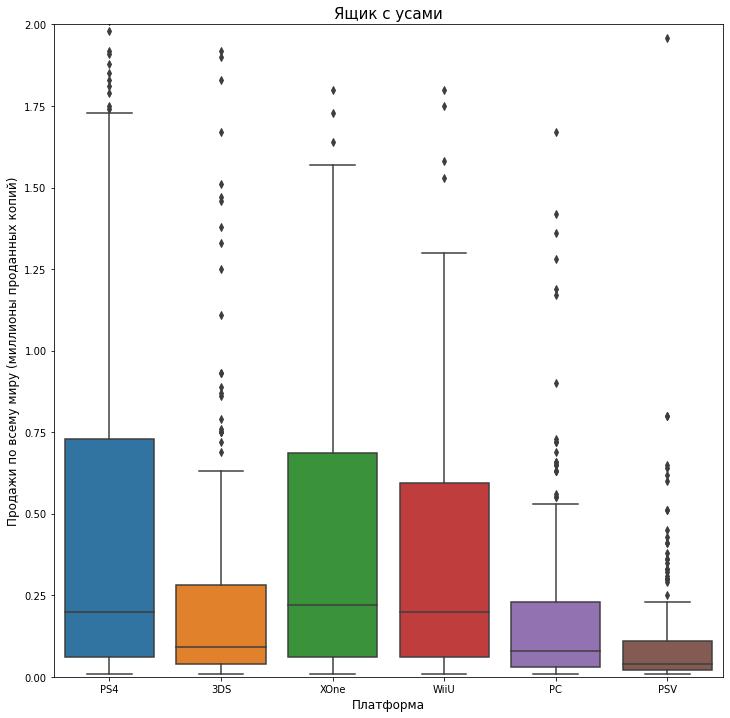

In [42]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data_act[data_act['platform'].isin(['PSV', 'WiiU', 'PS4', '3DS', 'XOne', 'PC'])], x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по всему миру (миллионы проданных копий)',fontsize=12)
plt.ylim(0, 2)

PS4, XOne и WiiU имеют схожие медианы - 0.2-0.22, PC ближе к 3DS - 0.08 и 0.09 соответственно, у PS Vita - 0.04. При этом средние значения значительно отличаются от медианных, можно отметить и значительный правый "ус" и значительные выбросы: так при у PS4 медиана 0.2, среднее 0.8, а максимум - 14.63, у 3DS при медиане 0.08 и среднем 0.47 максимум почти как у PS4 - 14.6. Все это можно объяснить тем, что каждый год выходит несколько игр-хитов, продающихся милионными тиражами, в то время как большинство игр продается тиражом в десятки - сотни тысяч. Именно за счет хитов 3DS умудряется обходить WiiU по продажам, имея заметно меньшее медианное зачение, в то время как PS4 и XOne обходят WiiU, имея почти одинаковые медианы. В аутсайдерах - PC и PS Vita.

### Рассмотрим, как влияют на продажи отзывы пользователей и критиков.

Построим диаграммы рассеяния и посчитаем корреляции для для продаж на PS4 и отзывов пользователей и критиков.

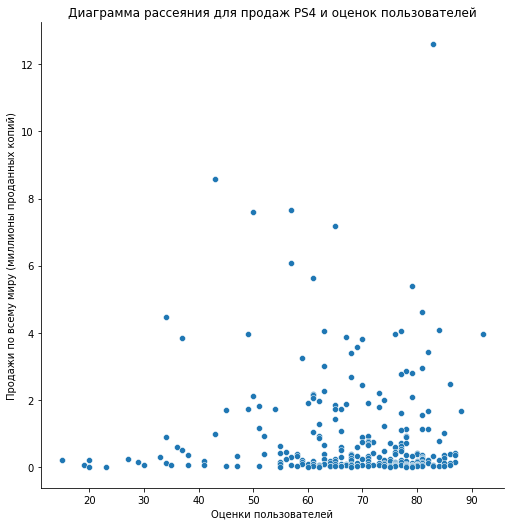

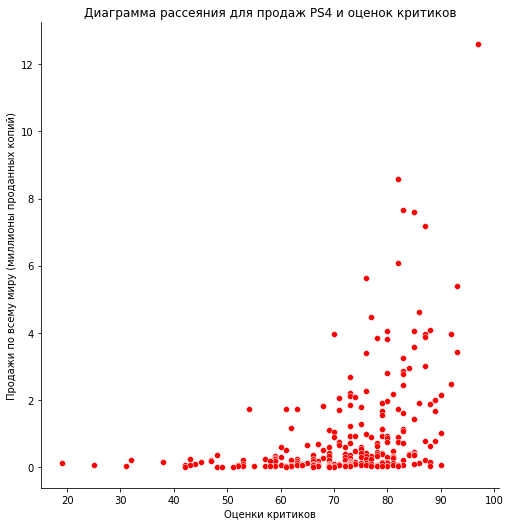

Корреляция продаж PS4 и оценок пользователей -0.03195711020455641
Корреляция продаж PS4 и оценок критиков 0.40656790206178095


In [43]:
sns.relplot(data=data_act.loc[(data_act['platform'] == 'PS4') & (data_act['user_score'] >= 0)], 
            x='user_score', y='total_sales', height=7)
plt.title(f'Диаграмма рассеяния для продаж PS4 и оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи по всему миру (миллионы проданных копий)')
sns.relplot(data=data_act.loc[(data_act['platform'] == 'PS4') & (data_act['critic_score'] >= 0)], 
            x='critic_score', y='total_sales', height=7, color='red')
plt.title(f'Диаграмма рассеяния для продаж PS4 и оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи по всему миру (миллионы проданных копий)')
plt.show()
print('Корреляция продаж PS4 и оценок пользователей', data_act.loc[(data_act['platform'] == 'PS4') 
                                                                   & (data_act['user_score'] >= 0)]['user_score']
      .corr(data_act.loc[(data_act['platform'] == 'PS4') & (data_act['user_score'] >= 0)]['total_sales']))
print('Корреляция продаж PS4 и оценок критиков', data_act.loc[(data_act['platform'] == 'PS4')
                                                              & (data_act['critic_score'] >= 0), 'critic_score']
      .corr(data_act.loc[(data_act['platform'] == 'PS4') & (data_act['critic_score'] >= 0), 'total_sales']))

Имеется умеренная корреляция между отзывами критиков и продажами, между отзывами игроков и продажами корреляции практически нет. Данную ситуацию можно объяснить тем, что оценки критиков появляются до или одновременно с выходом игр (игровые журналисты заранее получают копию игры от разработчиков) и могут повлиять на решение пользователей покупать игру или нет. Пользовательские же оценки появляются спустя некоторое время после выхода - к тому времени большинство покупателей уже определилось с выбором, кроме того пользовательская оценка может меняться со временем.

Рассмотрим теперь остальные 5 платформ.

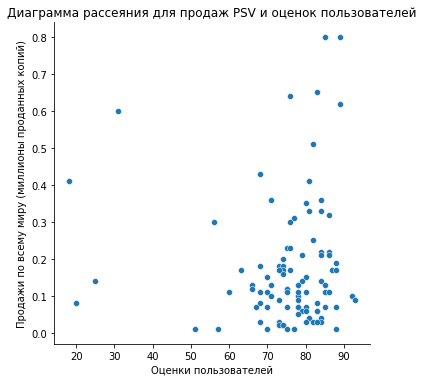

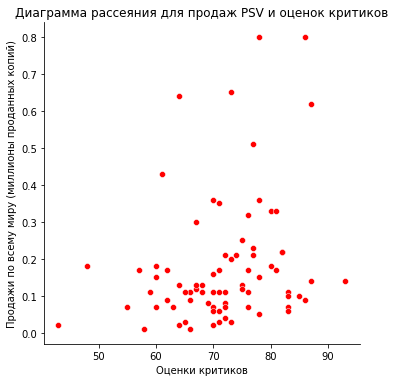

Корреляция продаж PSV и оценок пользователей 0.0009424723319108638
Корреляция продаж PSV и оценок критиков 0.2547423503068656


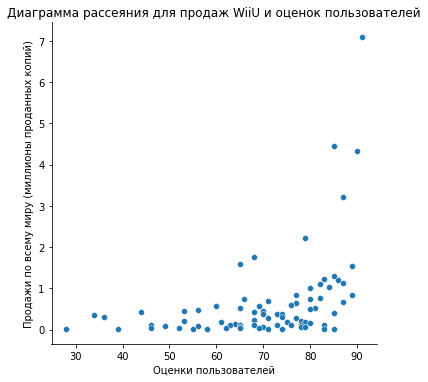

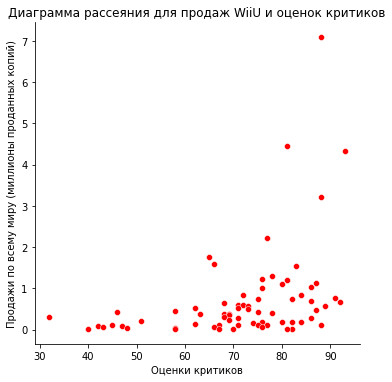

Корреляция продаж WiiU и оценок пользователей 0.41933048192661865
Корреляция продаж WiiU и оценок критиков 0.3764149065423912


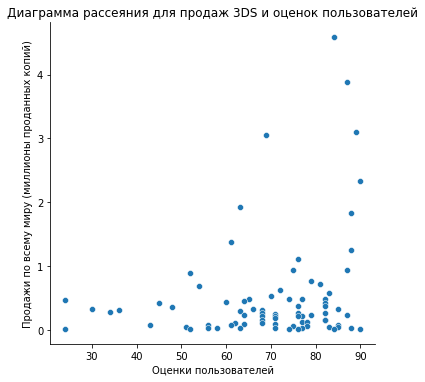

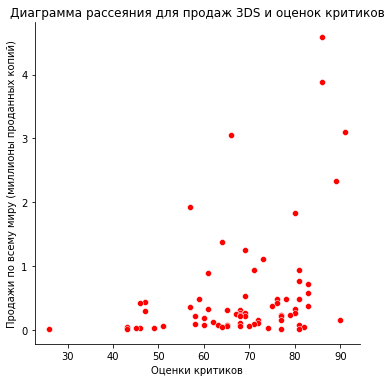

Корреляция продаж 3DS и оценок пользователей 0.24150411773563002
Корреляция продаж 3DS и оценок критиков 0.3570566142288103


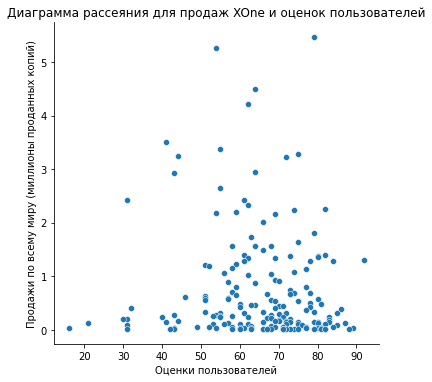

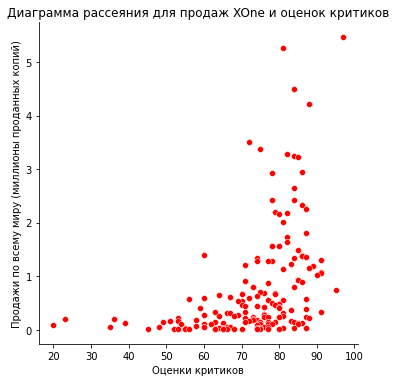

Корреляция продаж XOne и оценок пользователей -0.06892505328279411
Корреляция продаж XOne и оценок критиков 0.4169983280084017


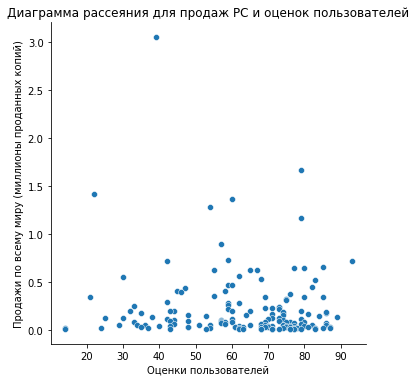

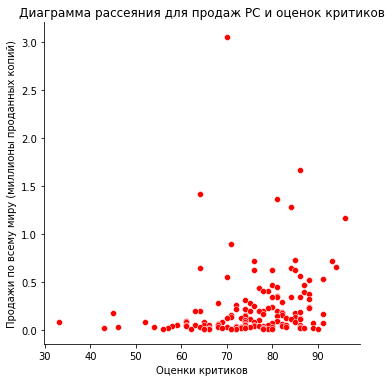

Корреляция продаж PC и оценок пользователей -0.08999775678448756
Корреляция продаж PC и оценок критиков 0.19965984836380182


In [44]:
for platform in ['PSV', 'WiiU', '3DS', 'XOne', 'PC']:
    sns.relplot(data=data_act.loc[(data_act['platform'] == platform) & (data_act['user_score'] >= 0)], 
                x='user_score', y='total_sales')
    plt.title(f'Диаграмма рассеяния для продаж {platform} и оценок пользователей')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи по всему миру (миллионы проданных копий)')
    sns.relplot(data=data_act.loc[(data_act['platform'] == platform) & (data_act['critic_score'] >= 0)], 
            x='critic_score', y='total_sales', color='red')
    plt.title(f'Диаграмма рассеяния для продаж {platform} и оценок критиков')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи по всему миру (миллионы проданных копий)')
    plt.show()
    print(f'Корреляция продаж {platform} и оценок пользователей', data_act.loc[(data_act['platform'] == platform)
                                                                               & (data_act['user_score'] >= 0), 'user_score']
          .corr(data_act.loc[(data_act['platform'] == platform) & (data_act['user_score'] >= 0), 'total_sales']))
    print(f'Корреляция продаж {platform} и оценок критиков', data_act.loc[(data_act['platform'] == platform)
                                                                               & (data_act['critic_score'] >= 0), 'critic_score']
          .corr(data_act.loc[(data_act['platform'] == platform) & (data_act['critic_score'] >= 0), 'total_sales']))

Итог:
* PS4 — умеренная корреляция с оценками критиков, с пользовательскими оценками - корреляции нет 
* PSVita — слабая корреляция с оценками критиков, с пользовательскими оценками - корреляции нет
* WiiU — умеренная корреляция с оценками и критиков и пользователей
* 3DS — умеренная корреляция с оценками критиков, слабая корреляция с оценками пользователей
* Xbox One — умеренная корреляция с оценками критиков, с пользовательскими оценками - корреляции нет
* PC — слабая корреляция с оценками критиков, с пользовательскими оценками - корреляции нет

Выделяются продукты Nintendo - в случае WiiU корреляция с оценками пользователей даже сильнее, чем у критиков. Возможно Nintendo имеет более отработанный сервис для выставления и демонстрации пользовательских оценок, либо продажи игр на на данных платформах более распределены по времени и больше игроков имеют возможность свериться с пользовательскими оценками.
    

### Посмотрим на общее распределение игр по жанрам

In [45]:
data_act.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'mean', 'median']).sort_values(
    by=('sum', 'total_sales'), ascending=False)

,sum,count,mean,median
,total_sales,total_sales,total_sales,total_sales
genre,,,,
Action,322.50,769,0.419376,0.110
Shooter,232.98,187,1.245882,0.450
Sports,150.65,214,0.703972,0.240
Role-Playing,145.89,292,0.499623,0.125
Misc,63.06,156,0.404231,0.105
Platform,42.63,74,0.576081,0.225
Racing,39.89,85,0.469294,0.120
Fighting,35.31,80,0.441375,0.125


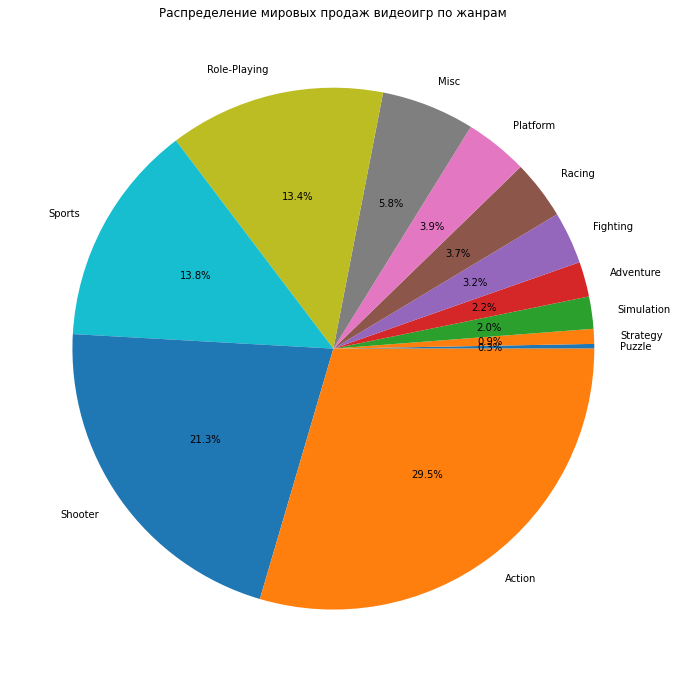

In [46]:
(data_act.groupby('genre')['total_sales'].agg('sum').sort_values()
 .plot(kind='pie', label='', autopct='%0.1f%%', figsize=(12, 12), 
       title='Распределение мировых продаж видеоигр по жанрам', grid=False))
plt.show()

На первом месте жанр Action, далее Shooter, затем спортивные игры - Sports, РПГ - Role-Playing. Остальные жанры не набирают и 4% каждый (будем исходить из того, что в "misc" все игры не попавшие в другие жанры). В целом пользователи отдают предпочтения играм действия - на Shooter и Action приходится половина всех продаж. 
Рассмотрим как будут выглядеть продажи по жанрам в расчете на одну игру. 

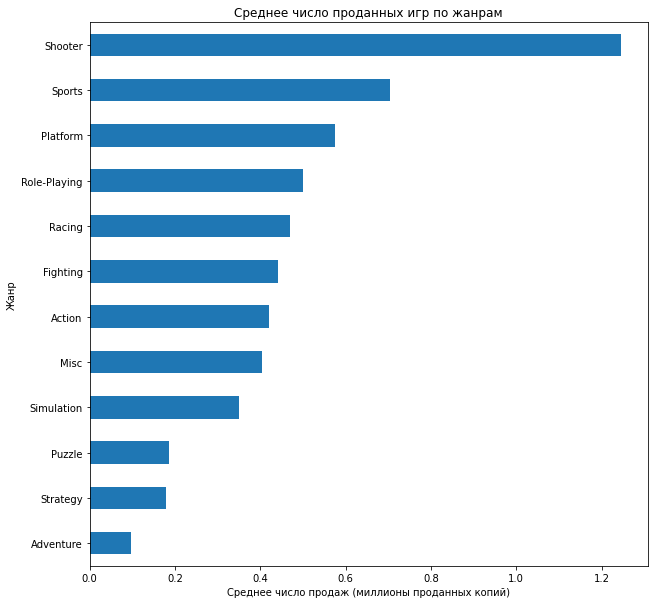

In [47]:
(data_act.groupby('genre')['total_sales'].agg('mean').sort_values()
 .plot(kind='barh', figsize=(10, 10), title='Среднее число проданных игр по жанрам', grid=False))
plt.xlabel('Среднее число продаж (миллионы проданных копий)')
plt.ylabel('Жанр')
plt.show()

Хотя на первом месте по продажам жанр Action, в среднем игры жанра Shooter расходятся наибольшими тиражами, далее следуют спортивные игры, платформеры и ролевые игры. Жанр Action только на 7-м месте.
Таким образом большие продажи жанра Action связаны в немалой степени с большим числом тайтлов выходящих в данном жанре (769 против 187 в жанре Shooter). Наименьшие продажи у жанра Puzzle, однако надо заметить, что и затрата на разработку в данном жанре заметно меньше, чем в Action или Shooter.

**Подводя итог, можно сказать, что при планировании рекламной кампании следует ориентироваться на консоли нового поколения (особенно PS4, Xbox One и 3DS), среди жанров особое внимание стоит уделить Action, Shooter, ролевым и спортивным играм. Наличие положительных оценок критиков также может хорошо сказаться на продажах.**

## Портрет пользователя каждого региона

Составим портрет пользователя каждого региона (Северная Америка, Европа, Япония). 

### Начнем с распределения продаж по платформам.

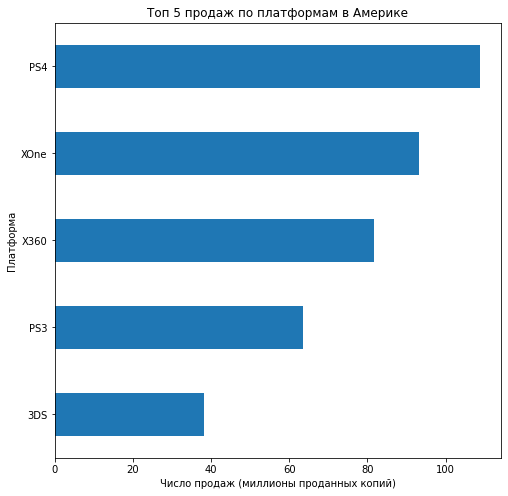

           Продажи в Северной Америке
Платформа                            
PS4                            108.74
XOne                            93.12
X360                            81.66
PS3                             63.50
3DS                             38.20


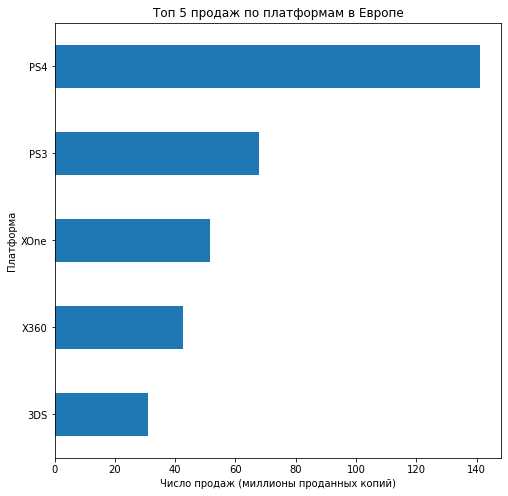

           Продажи в Европе
Платформа                  
PS4                  141.09
PS3                   67.81
XOne                  51.59
X360                  42.52
3DS                   30.96


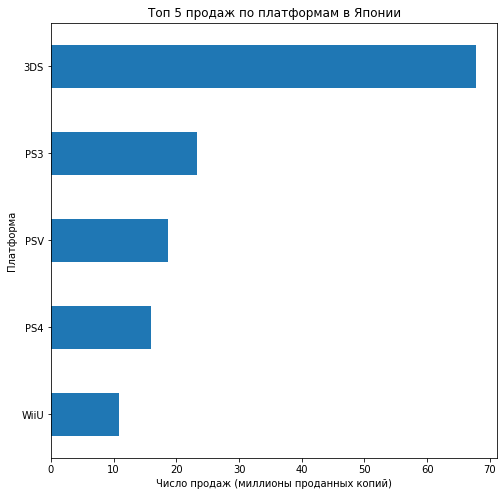

           Продажи в Японии
Платформа                  
3DS                   67.81
PS3                   23.35
PSV                   18.59
PS4                   15.96
WiiU                  10.88


In [48]:
# Переименуем столбцы для лучшей визуализации данных
data_act = data_act.rename(columns = {'na_sales':'Продажи в Северной Америке', 'eu_sales':'Продажи в Европе', 
                                      'jp_sales':'Продажи в Японии', 'genre':'Жанр', 'platform':'Платформа', 
                                      'rating':'Рейтинг ESRB'})

for region in ['Продажи в Северной Америке', 'Продажи в Европе', 'Продажи в Японии']:
    (data_act.pivot_table(index='Платформа', values=region, aggfunc='sum').sort_values(region).tail()
     .plot(kind='barh', figsize=(8, 8), title=f'Топ 5 продаж по платформам в {region.split()[-1]}', grid=False, legend=False))
    plt.xlabel('Число продаж (миллионы проданных копий)')
    plt.show()
    print(data_act.pivot_table(index='Платформа', values=region, aggfunc='sum').sort_values(region, ascending=False).head())    

Итог:
* В Америке на первом месте PS4, далее Xbox One, затем идут две консоли предыдущего поколения - Xbox 360 и PS3 и замыкает пятерку лидеров 3DS.
* В Европе на первом месте такжк PS4, далее с двухкратным отставанием PS3, затем консоли Microsoft - Xbox One  и Xbox 360 и замыкает пятерку лидеров также 3DS.
* Совершенно иная картина в Японии - на первом месте, с почти трехкратным отставанием 3DS, далее по убыванию PS3, PS Vita, PS4 и WiiU. Продукты Microsoft в топ-5 Японии не попали вовсе.

### Теперь рассмотрим жанровые предпочтения.

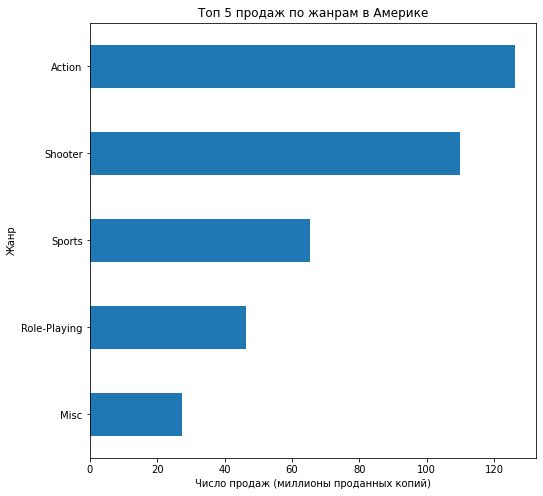

              Продажи в Северной Америке
Жанр                                    
Action                            126.13
Shooter                           109.74
Sports                             65.27
Role-Playing                       46.40
Misc                               27.49



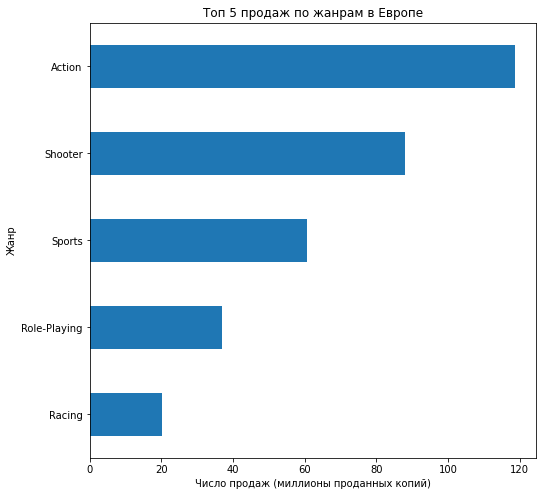

              Продажи в Европе
Жанр                          
Action                  118.61
Shooter                  87.86
Sports                   60.52
Role-Playing             36.97
Racing                   20.19



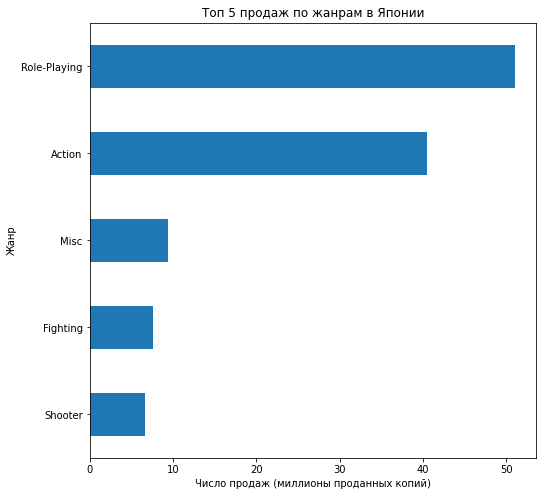

              Продажи в Японии
Жанр                          
Role-Playing             51.04
Action                   40.49
Misc                      9.44
Fighting                  7.65
Shooter                   6.61



In [49]:
for region in ['Продажи в Северной Америке', 'Продажи в Европе', 'Продажи в Японии']:
    (data_act.pivot_table(index='Жанр', values=region, aggfunc='sum').sort_values(region).tail()
     .plot(kind='barh', figsize=(8, 8), title=f'Топ 5 продаж по жанрам в {region.split()[-1]}', grid=False, legend=False))
    plt.xlabel('Число продаж (миллионы проданных копий)')
    plt.show()
    print(data_act.pivot_table(index='Жанр', values=region, aggfunc='sum').sort_values(region, ascending=False).head())
    print()    

Итог:
* В Америке жанровое распределение в целом соответствует мировому - на первом месте Action, далее Shooter, затем идут спортивные и ролевые игры, и замыкает топ-5 жанров категория "Misc" - прочее.  
* В Европе аналогичное распределение с той разницей, что на пятой позиции находится жанр гоночных игр - Racing. 
* Япония вновь значительно отличается - на первом месте ролевые игры, затем Action, далее с четырехкратным отставанием идет сборная категория Misc, за ней - жанры Shooter и Fighting.  

### Рассмотрим влияние рейтинга ESRB на продажи

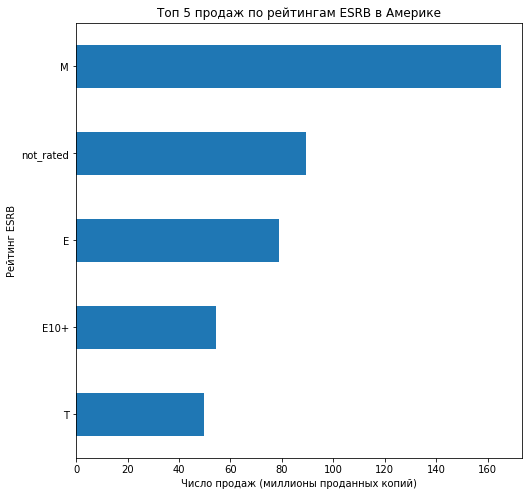

              Продажи в Северной Америке
Рейтинг ESRB                            
M                                 165.29
not_rated                          89.42
E                                  79.05
E10+                               54.24
T                                  49.79



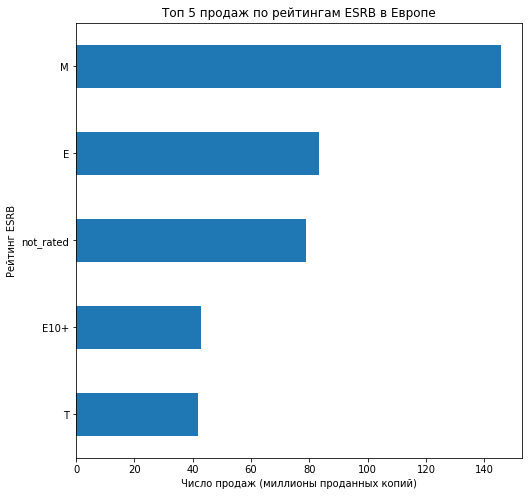

              Продажи в Европе
Рейтинг ESRB                  
M                       145.80
E                        83.36
not_rated                78.91
E10+                     42.69
T                        41.95



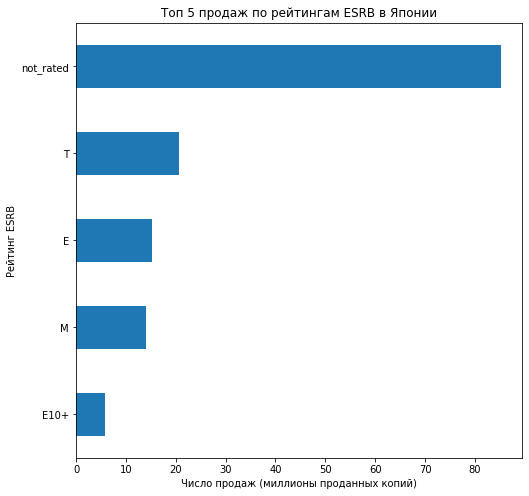

              Продажи в Японии
Рейтинг ESRB                  
not_rated                85.29
T                        20.59
E                        15.14
M                        14.11
E10+                      5.89



In [50]:
for region in ['Продажи в Северной Америке', 'Продажи в Европе', 'Продажи в Японии']:
    (data_act.pivot_table(index='Рейтинг ESRB', values=region, aggfunc='sum').sort_values(region).tail()
     .plot(kind='barh', figsize=(8, 8), title=f'Топ 5 продаж по рейтингам ESRB в {region.split()[-1]}', grid=False, legend=False))
    plt.xlabel('Число продаж (миллионы проданных копий)')
    plt.show()
    print(data_act.pivot_table(index='Рейтинг ESRB', values=region, aggfunc='sum').sort_values(region, ascending=False).head())
    print()
    
# Вернем столбцам их исходные значения
data_act = data_act.rename(columns = {'Продажи в Северной Америке':'na_sales', 'Продажи в Европе':'eu_sales',
                                      'Продажи в Японии':'jp_sales', 'Жанр':'genre', 'Платформа':'platform',  
                                      'Рейтинг ESRB':'rating'})      

Итог:
* В Америке первое место по продажам занимают игры с рейтингом M - Mature (от 17 лет и старше), далее следуют игры без рейтинга - возможно рейтинг еще не выставлен (проблемы могли возникнуть при выставлении рейтинга для игр, предусматривающих многопользовательский режим), возможно произошла ошибка при заполнении таблицы. Затем идут рейтинги E - Everyone (для всех) и E10+ - Everyone 10+ (для всех от 10 лет) и наконец T - Teen (от 13 лет).  
* В Европе аналогичное распределение с той разницей, что поменялись местами игры с рейтингом E (2 место) и без рейтинга (3 место). 
* Япония уже традиционно имеет свое распределение - на первом месте, со значительным отрывом (85 млн. - больше половины всех проданных в Японии игр) находятся игры без рейтинга - это вполне можно объяснить тем, что многие игры не выходили за пределами Японии и соответственно не получили рейтинга ESRB (но вполне могли получить рейтинг CERO - японского аналога ESRB). Далее по убыванию следуют T, E, M и E10+. 

### Итог

Портреты пользователей из Америки и Европы в целом схожи: 
* предпочитаемые жанры - игры действия (Action и Shooter), спортивные и ролевые игры; 
* по платформам - на первом месте PS4, но в Америке с небольшим отрывом идут продукты от Microsoft, а затем PS3 и 3DS, в Европе же с заметным отставанием от лидера идеи PS3 и лишь затем Xbox One, Xbox 360 и 3DS - продукты от Microsoft в Европе не так популярны; 
* по рейтингам ESRB ситуация схожая - на первом месте игры для взрослых игроков (рейтинг M) - многие игроки, начавшие играть еще в юном возрасте, выросли и хотят играть в более взрослые игры, далее распределение по рейтингу отличается только в том, что в Америке игры без рейтинга попали на 2-е место, а в Европе на 3-е, с рейтингом E ситуация обратная.

Заметно оличается портрет пользователя из Японии:
* предпочитаемые жанры - на первом месте ролевые игры, затем экшены, сборная категория Misc, симуляторы и файтинги; 
* по платформам - на первом месте с большим отрывом 3DS, затем продукты от Sony - PS3, PS Vita, PS4 и на 5-м месте WiiU, японские игроки проявляют больший интерес к портативным консолям; 
* по рейтингам - больше половины продаж приходится на игры без рейтинга ESRB - вероятнее всего это издаваемые только в Японии игры, далее с большим отставанием по убыванию следуют T, E, M и E10+. В целом для определения более точного портрета японского игрока желательно иметь данные японского рейтинга CERO.   

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сравним размеры выборок.

In [51]:
print('Размер выборки по Xbox One:', 
      data_act.loc[(data_act['platform'] == 'XOne') & (data_act['user_score'] >= 0), 'user_score'].count())

Размер выборки по Xbox One: 182


In [52]:
print('Размер выборки по PC:',
      data_act.loc[(data_act['platform'] == 'PC') & (data_act['user_score'] >= 0), 'user_score'].count())

Размер выборки по PC: 158


Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [53]:
alpha = 0.05 # примем пороговое значение alpha равным 5%

# Выборки независемы - используем метод ttest_ind
results = st.ttest_ind(
    data_act.loc[(data_act['platform'] == 'XOne') & (data_act['user_score'] >= 0), 'user_score'], 
    data_act.loc[(data_act['platform'] == 'PC') & (data_act['user_score'] >= 0), 'user_score'], 
    equal_var=False) # Выборки отличаются по размеру, установим значение equal_var равным False
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1617435980178472
Не получилось отвергнуть нулевую гипотезу


Можно предположить, что средние пользовательские рейтинги платформ Xbox One и PC равны.

### Средние пользовательские рейтинги жанров Action и Sports разные

Сравним размеры выборок.

In [54]:
print('Размер выборки по жанру Action:',
      data_act.loc[(data_act['genre'] == 'Action') & (data_act['user_score'] >= 0), 'user_score'].count())

Размер выборки по жанру Action: 392


In [55]:
print('Размер выборки по жанру Sports:',
      data_act.loc[(data_act['genre'] == 'Sports') & (data_act['user_score'] >= 0), 'user_score'].count())

Размер выборки по жанру Sports: 160


Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [56]:
alpha = 0.05 # примем пороговое значение alpha равным 5%

# Выборки независемы - используем метод ttest_ind
results = st.ttest_ind(
    data_act.loc[(data_act['genre'] == 'Action') & (data_act['user_score'] >= 0), 'user_score'], 
    data_act.loc[(data_act['genre'] == 'Sports') & (data_act['user_score'] >= 0), 'user_score'], 
    equal_var=False) # Выборки отличаются по размеру, установим значение equal_var равным False
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3883444596406352e-20
Отвергаем нулевую гипотезу


Можно предположить, что средние пользовательские рейтинги жанров Action и Sports не равны.

## Вывод

1. Первым делом стоит заметить, что начиная с 2009 года на рынке видеоигр наблюдается спад, связанный с ростом популярности мобильных платформ.
2. При планировании рекламной кампании на 2017 год следует в первую очередь обратить внимание на консоли нового поколения (PS4, Xbox One, 3DS, WiiU, PS Vita).
3. Важно обратить внимание на разницу между западным (Северная Америка и Европа) и японским рынками:
* Для западного рынка предпочтительны платформы PS4, Xbox One и в меньшей степени 3DS (при этом Xbox более популярна в Америке), предпочтительные жанры - Action, Shooter, Sports, Role-Playing. Игроки предпочитают взрослые игры - наибольшее число продаж у игр с рейтингом ESRB Mature.
* Японский игрок предпочитает портативные консоли - 3DS (1-е место с заметным отрывом), PS Vita, далее идут PS4 и WiiU, Xbox же большой популярностью не пользуется. Жанровые предпочтения - впереди с большим отрывом ролевые игры и экшены (Action), далее сборная категория Misc, Fighting и Shooter. Так как значительное число японских игр за пределами Японии не издавалось, то и рейтинга ESRB у них нет (85 млн. - больше половины всех проданных в Японии игр), в остальном распределение по рейтингам следующее: T, E, M и E10+. 
4. Оценки критиков в некоторой степени влияют на продажи (в целом лучше продаются игры с высокой оценкой), особого влияния пользовательских оценок на продажи нет, за исключением 3DS и WiiU - здесь между продажами и оценками игроков есть умеренная или слабая корреляция.